Retrieves images from "raw_imgs" folder and stores them in "full_imgs". Retrieves spreadsheet listing VOIs and stores them in text file.

TODO: function to read existing vois, drop one class, then load the class back in. Requires that drm.load_imgs write to a DataFrame rather than an array

In [118]:
import artif_gen_methods as agm
import config
import dr_methods as drm
import niftiutils.helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil
import time
import voi_methods as vm
%matplotlib inline

In [208]:
importlib.reload(config)
importlib.reload(hf)
importlib.reload(vm)
importlib.reload(drm)
importlib.reload(agm)
C = config.Config()

# Generate data

In [ ]:
drm.dcm2npy_batch()

In [20]:
voi_df_art, voi_df_ven, voi_df_eq = drm.get_voi_dfs()

In [ ]:
vm.xref_dirs_with_excel()

In [ ]:
drm.load_patient_info(overwrite=False)

In [ ]:
drm.report_missing_folders()

In [ ]:
drm.load_vois_batch(cls=None, overwrite=False)

In [ ]:
vm.extract_vois()

In [ ]:
vm.reload_accnum('hcc', ['E105464882'], augment=True, overwrite=True)

In [ ]:
vm.save_unaugment_set()
vm.save_vois_as_imgs()

In [ ]:
vm.parallel_augment(num_cores=3, overwrite=100)

In [270]:
voi_df_art[voi_df_art['id'].str.contains('2424_2')]
#voi_df_art[voi_df_art.index.str.contains('9185_0')]

,Filename,x1,x2,y1,y2,z1,z2,cls,flipz,real_dx,real_dy,real_dz,id,lesion_num
176,E100592424.npy,64,99,50,82,43,61,colorectal,False,54.6875,50.0,54.0,E100592424_2,2


# Plotting

In [127]:
#voi_df_art[voi_df_art["acc_num"] == "12874178"]
voi_df_art[voi_df_art["Filename"] == "12678910.npy"]

,Filename,x1,x2,y1,y2,z1,z2,cls,flipz,real_dx,real_dy,real_dz,id,lesion_num
3,E100610622.npy,180,192,157,171,48,54,cyst,False,15.75,18.375,18.0,E100610622_0,0


In [ ]:
cls = "hcc"
acc_num = 'E103224933'
img = np.load(C.full_img_dir+"\\"+cls + "\\"+acc_num + ".npy")
hf.plot_slice_flips(img, voi_df_art[(voi_df_art["acc_num"] == acc_num) & (voi_df_art["cls"] == cls)].iloc[0])
print(np.amin(img), np.amax(img), np.mean(img))
#hf.plot_section_auto(img)

-1.00267556682 1.0 -0.25959287858


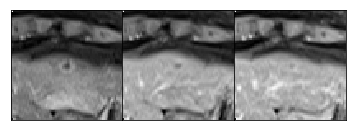

In [171]:
img = drm.plot_check(1, "12961059_0", normalize=[-.8,.5])
print(np.amin(img), np.amax(img), np.mean(img))

In [204]:
vm.save_vois_as_imgs(lesion_ids=replacement_Z, save_dir=r"Z:\Inter-reader study\DICOMs\subs")

In [217]:
vm.save_imgs_with_bbox(lesion_ids=replacement_Z2, save_dir=r"Z:\Inter-reader study\DICOMs\subs2")

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


# Generate reader study samples

In [166]:
replacements

['colorectal',
 'cholangio',
 'cyst',
 'fnh',
 'fnh',
 'fnh',
 'fnh',
 'hemangioma',
 'cyst',
 'fnh']

In [210]:
for cls in ['cholangio',
'cholangio',
'hcc',
'cholangio']:
    print(cls, random.choice([z for z in os.listdir(C.orig_dir + cls) if z[:z.find('_')] not in banned_accnums]))

cholangio 11534565_0.npy
cholangio E103171388_0.npy
hcc E100262351_0.npy
cholangio E103647211_0.npy


In [24]:
voi_df_art, voi_df_ven, voi_df_eq = drm.get_voi_dfs()

In [149]:
voi_df_art = pd.read_csv("..\\data\\voi_art.csv")

In [186]:
old_Z_reader = ['12888679_2.npy', 'E101218384_5.npy', '12324408_0.npy', '12975280_0.npy', 'E100962970_0.npy', 'E101083458_1.npy', 'E105311123_0.npy', 'E104697262_0.npy', 'E100183257_1.npy', 'E103312835_1.npy', '13203550_7.npy', '12207268_0.npy', 'E100610622_0.npy', 'E100718398_0.npy', '12302576_0.npy', '12207268_2.npy', '12530153_0.npy', '13028374_0.npy', '12451831_0.npy', '12569826_0.npy', '12678910_1.npy', '12239783_0.npy', '12842070_0.npy', '12799652_0.npy', '12678910_0.npy', '12823036_0.npy', '11907521_0.npy', 'E100168661_0.npy', '12874178_3.npy', '12788616_0.npy', 'E102093118_0.npy', 'E105310461_0.npy', 'E103200384_1.npy', 'E102634440_0.npy', '12569915_0.npy', 'E102095465_0.npy', 'E102929168_0.npy', 'E102613189_0.npy', 'E103020139_1.npy', '12582632_0.npy', 'E100894274_0.npy', 'E100407633_0.npy', 'E101069048_1.npy', 'E101225606_0.npy', '13031955_0.npy', '12783467_0.npy', '13092966_0.npy', 'E105344747_0.npy', 'E100199185_0.npy', 'E106096969_0.npy', '12362250_5.npy', 'E100192709_1.npy', 'E105244287_0.npy', 'E106182827_0.npy', '13092836_2.npy', '12362250_4.npy', 'E104853578_1.npy', 'E100215900_8.npy', 'E102677567_0.npy', 'E100383453_0.npy']
old_Z_reader = [z[:-4] for z in old_Z_reader]

In [163]:
banned_accnums = [z[:z.find('_')] for z in old_Z_reader]

In [257]:
len(Z_reader)

60

In [256]:
Z_reader = list(set(old_Z_reader).difference(hitlist)) + replacement_Z + ['E100262351_0']

In [148]:
#Z_reader = ['12569915_0', 'E106182827_0', 'E101225606_0', '12362250_5', '12799652_0', '12239783_0', 'E100962970_0', '12678910_0', '12823036_0', 'E101069048_1', 'E100168661_0', '13092836_2', '12207268_0', 'E102093118_0', '12842070_0', '12874178_3', '12788616_0', '12783467_0', 'E100192709_1', 'E100718398_0', '12569826_0', '12678910_1', 'E102634440_0', 'E100407633_0', 'E100894274_0', 'E105310461_0', '12530153_0', '13028374_0', 'E105344747_0', 'E106096969_0', '12975280_0', '12451831_0', 'E103020139_1', 'E104697262_0', 'E102929168_0', 'E102613189_0', 'E105244287_0', 'E102095465_0', 'E100383453_0', 'E101083458_1', '12888679_2', '13092966_0', '12302576_0', '12207268_2', '12324408_0', 'E100199185_0', '13031955_0', 'E100183257_1', 'E105311123_0', 'E100610622_0', '12582632_0', '11907521_0', 'E103312835_1']

In [246]:
replacement_Z = ['12961059_0.npy','E105427046_0.npy','13112385_1.npy','E101415263_0.npy','12552705_0.npy','E105918926_0.npy','E103192914_0.npy','E100121654_0.npy','E100314676_0.npy','E102782525_0.npy']
replacement_Z = [z[:-4] for z in replacement_Z]

In [243]:
replacement_Z2 = ['11534565_0', 'E103171388_0', 'E100262351_0', 'E103647211_0']

In [160]:
len(Z_reader)

50

In [269]:
voi_reader = voi_df_art[voi_df_art["id"].isin(Z_reader)]#voi_df_art[voi_df_art.index.isin(Z_reader)]

In [262]:
import csv
with open('Z:\\eggs.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    for k in Z_reader:
        spamwriter.writerow([k, f_map[k], cls_map[k]])

In [260]:
f_map = {}
b_map = {}
cls_map = {}

In [261]:
for cls in C.classes_to_include:
    for index, row in voi_reader[voi_reader['cls'] == cls].iterrows():
        img_id = str(sum([row["x1"], row["x2"], row["y1"], row["y2"]])*10+row["z1"])
        acc_num = row["Filename"][:-4] #row["acc_num"]
        f_map[row["id"]] = img_id
        b_map[img_id] = row["id"]#acc_num
        cls_map[row["id"]] = row["cls"]#acc_num
        #if cls == "fnh":#img_id == "4613":
        print("Z:\\DICOMs\\" + cls + "\\" + acc_num, 
              row["x1"], row["x2"], row["y1"], row["z1"], "---", img_id)
        try:
            print(b_map[img_id])
        except:
            pass

Z:\DICOMs\hcc\E100262351 170 205 209 32 --- 8292
E100262351_0
Z:\DICOMs\hcc\E106096969 66 93 144 46 --- 4826
E106096969_0
Z:\DICOMs\hcc\E101225606 107 118 109 51 --- 4611
E101225606_0
Z:\DICOMs\hcc\E101069048 182 219 155 48 --- 7518
E101069048_1
Z:\DICOMs\hcc\E105344747 217 241 232 46 --- 9506
E105344747_0
Z:\DICOMs\hcc\E100407633 88 108 108 70 --- 4340
E100407633_0
Z:\DICOMs\hcc\13092966 41 53 137 22 --- 3812
13092966_0
Z:\DICOMs\hcc\12783467 62 71 109 54 --- 3724
12783467_0
Z:\DICOMs\hcc\13031955 55 73 162 28 --- 4738
13031955_0
Z:\DICOMs\hcc\E100894274 94 107 58 51 --- 3371
E100894274_0
Z:\DICOMs\cholangio\12582632 68 112 99 38 --- 4158
12582632_0
Z:\DICOMs\cholangio\E103020139 163 189 179 44 --- 7444
E103020139_1
Z:\DICOMs\cholangio\12569915 53 117 44 48 --- 3228
12569915_0
Z:\DICOMs\cholangio\E102093118 62 111 49 56 --- 3256
E102093118_0
Z:\DICOMs\cholangio\E102929168 182 274 161 35 --- 8825
E102929168_0
Z:\DICOMs\cholangio\E102634440 89 121 74 48 --- 4018
E102634440_0
Z:\DICOMs\c

In [190]:
f_map['E100199185'] = '46130'
b_map['4613'] = "12678910_1"
#b_map['46130'] = "E100199185_0"

In [237]:
hitlist = []
replacements = []

for secret_id in ['4181', '2858', '3505', '4194', '2821', '5912', '5047'] + ['4354', '3049', '5438'] + ['46130']:#['4158', '5720', '46130', '7444']:
    print(cls_map[b_map[secret_id]])
    hitlist.append(b_map[secret_id])
    replacements.append(cls_map[b_map[secret_id]])

colorectal
cholangio
cyst
fnh
fnh
fnh
fnh
hemangioma
cyst
fnh
hcc


In [164]:
import shutil

In [165]:
for secret_id in ['4181', '2858', '3505', '4194', '2821', '5912', '5047']:
    base_dir = r"Z:\Inter-reader study\DICOMs"
    shutil.move(os.path.join(base_dir, secret_id), os.path.join(base_dir, "Unused", secret_id))

In [ ]:
b_map['7048']

In [33]:
multi_accnums = [accnum for accnum, count in zip(*np.unique(list(b_map.values()), return_counts=True)) if count>1]

In [34]:
for accnum in multi_accnums:
    f_map[accnum] = '-'.join([k for k in b_map if b_map[k] == accnum])
    #print(accnum, '-'.join([k for k in b_map if b_map[k] == accnum]))

In [276]:
for _, row in voi_reader.iterrows():
    cls = row["cls"]
    acc_num = str(row["Filename"])[:-4]
    #if row['id'] in ["E103544209_0", "E100199185_0", "E100592424_2"]:
    for protocol in ["T1_AP", "T1_VP", "T1_EQ"]:
        target_dir = os.path.join("Z:\\Inter-reader study\\DICOMs\\extras", row['id'], protocol)
        shutil.copytree(os.path.join("Z:\\DICOMs", cls, acc_num, protocol), target_dir)

In [121]:
for acc_num in f_map:
    try:
        os.rename(os.path.join("Z:\\Inter-reader study\\DICOMs", acc_num),
                  os.path.join("Z:\\Inter-reader study\\DICOMs", f_map[acc_num]))
    except Exception as e:
        print(acc_num, e)

E100718398 [WinError 2] The system cannot find the file specified: 'Z:\\Inter-reader study\\DICOMs\\E100718398' -> 'Z:\\Inter-reader study\\DICOMs\\4968'
13092836 [WinError 2] The system cannot find the file specified: 'Z:\\Inter-reader study\\DICOMs\\13092836' -> 'Z:\\Inter-reader study\\DICOMs\\3676'


# Read Run Stats

In [52]:
import re
import operator

df = pd.read_csv(C.run_stats_path)

df = df.dropna(subset=['misclassified_test'])
df = df.loc[:,['misclassified_test','misclassified_train']]
#df = df.dropna()
#b = a.iloc[0]['y_pred_raw']
#b = hf.str_to_lists(b)

mis_test = df['misclassified_train'].values
#mis_test = df['misclassified_test'].values

mis_test = ''.join(mis_test)
mis_test = mis_test.replace(' ','')
mis_test = mis_test.replace("'","")
mis_test = re.sub(r'\]\[', ',', mis_test)
mis_test = mis_test.replace("[","")
mis_test = mis_test.replace("]","")

mis_test = mis_test.split(',')

unique, counts = np.unique(mis_test, return_counts=True)

x = dict(zip(unique, counts))

sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
sorted_x

In [14]:
df = pd.read_csv(C.run_stats_path)
df = df[(df['test_num'] == 10) & (~df['time_dist']) & (df['steps_per_epoch'] == 750) & (df['timestamp'] > 1515210355)]

In [21]:
train_acc = [1-x.count("npy")/434 for x in df['misclassified_train'].values]

In [27]:
np.mean(train_acc)

0.9958525345622119

In [112]:
cms = df['confusion_matrix'].values

cms = ''.join(cms)

ret = hf.str_to_lists(cms, dtype=int)

supercm = ret

supercm = [supercm[rownum:rownum+6] for rownum in range(0,len(supercm),6)]

supercm = np.array(supercm)

cm_sum = np.empty((6,6))

for i in range(6):
    for j in range(6):
        cm_sum[i,j] = np.sum(supercm[:,i,j])

for i in range(6):
    for j in range(6):
        print(cm_sum[j,i],end='\t')
    print()

187.0	4.0	1.0	0.0	0.0	11.0	
1.0	180.0	18.0	0.0	10.0	6.0	
3.0	6.0	177.0	3.0	7.0	0.0	
0.0	0.0	1.0	197.0	2.0	0.0	
1.0	2.0	3.0	0.0	181.0	2.0	
8.0	8.0	0.0	0.0	0.0	181.0	


In [29]:
truths = df['y_true'].values
truths = ''.join(truths)
truths = hf.str_to_lists(truths, dtype=int)
truths = np.array(truths)

predictions = df['y_pred_raw'].values
predictions = ''.join(predictions)
predictions = hf.str_to_lists(predictions, dtype=float)
predictions = [predictions[rownum:rownum+60] for rownum in range(0,len(predictions),60)]
predictions = np.array(predictions)

hcc_thresh = []
nonhcc_thresh = []
thresh_dict = {}

for run_num in range(20):
    for lesion_num in range(60):
        if truths[run_num, lesion_num] == C.classes_to_include.index('hcc'):
            hcc_thresh.append(predictions[run_num, lesion_num, 0])
            thresh_dict[predictions[run_num, lesion_num, 0]] = 'hcc'
        else:
            nonhcc_thresh.append(predictions[run_num, lesion_num, 0])
            thresh_dict[predictions[run_num, lesion_num, 0]] = 'non-hcc'

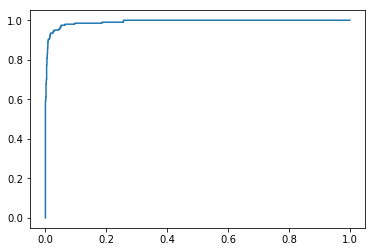

In [31]:
TPR = [200/200]
FPR = [1000/1000]

hcc_correct = 200
hcc_wrong = 1000
for key in sorted(thresh_dict):
    if thresh_dict[key] == 'hcc':
        hcc_correct -= 1
    else:
        hcc_wrong -= 1
    TPR.append(hcc_correct/200)
    FPR.append(hcc_wrong/1000)

plt.plot(FPR, TPR)

In [37]:
AUC = sum([(FPR[i]-FPR[i+1])*TPR[i] for i in range(len(FPR)-1)])
AUC

0.9922300000000035

a = run_stats.loc[:,['y_true','y_pred_raw']]
a = a.dropna()
b = a.iloc[0]['y_pred_raw']
b = hf.str_to_lists(b)

# Artificial images

In [ ]:
agm.gen_imgs()
img = agm.visualize_gen_img('hemangioma')